# Using Pushshift Module to extract Submissions Data from Reddit via Python


This is the part (1) of our project. 

Code courtesy: https://github.com/pushshift/api

---



Authors:

Ritik Jain - jcs212260@iitd.ac.in

Tooba Khan - Tooba.Khan.jcs21@csia.iitd.ac.in 

Animesh Parihar - jcs212235@iitd.ac.in

# Import modules

In [ ]:
import pandas as pd
import requests #Pushshift accesses Reddit via an url so this is needed
import json #JSON manipulation
import csv #To Convert final table into a csv file to save to your machine
import time
import datetime

"""
Graph representation: Networkx

Submissions data: posts have to be extracted and the authors or posts will be nodes.
For every author(node), store the following: {Post ID, Title, Score, Publish Date, Total No. of Comments}
node1:  {Post ID, Title, Score, Publish Date, Total No. of Comments},
        {Post ID, Title, Score, Publish Date, Total No. of Comments},
        {Post ID, Title, Score, Publish Date, Total No. of Comments},
        {Post ID, Title, Score, Publish Date, Total No. of Comments}

Comments Data:
Comment's author id: x
post id: y
author of post y: z
so a directed edge from x-->z
"""

"\nGraph representation: Networkx\n\nSubmissions data: posts have to be extracted and the authors or posts will be nodes.\nFor every author(node), store the following: {Post ID, Title, Score, Publish Date, Total No. of Comments}\nnode1:  {Post ID, Title, Score, Publish Date, Total No. of Comments},\n        {Post ID, Title, Score, Publish Date, Total No. of Comments},\n        {Post ID, Title, Score, Publish Date, Total No. of Comments},\n        {Post ID, Title, Score, Publish Date, Total No. of Comments}\n\nComments Data:\nComment's author id: x\npost id: y\nauthor of post y: z\nso a directed edge from x-->z\n"

# Pushshift URL Examples

In [ ]:
#We can access the Pushshift API through building an URL with the relevant parameters without even needing Reddit credentials.
#These are some examples. You can follow the links and they will generate a page with JSON data
search_ps4_after_date = "https://api.pushshift.io/reddit/search/submission/?q=screenshot&after=1514764800&before=1517443200&subreddit=PS4"
search_science = "https://api.pushshift.io/reddit/search/submission/?q=science"

# Parameters for your Pushshift URL


In [ ]:
#Adapted from this https://gist.github.com/dylankilkenny/3dbf6123527260165f8c5c3bc3ee331b
#This function builds an Pushshift URL, accesses the webpage and stores JSON data in a nested list
def getPushshiftData(query, after, before, sub):
    #Build URL
    url = 'https://api.pushshift.io/reddit/search/submission/?size=1000&after='+str(after)+'&before='+str(before)+'&subreddit='+str(sub)
    #Print URL to show user
    print(url)
    #Request URL
    r = requests.get(url)
    #Load JSON data from webpage into data variable
    data = json.loads(r.text)
    #return the data element which contains all the submissions data
    return data['data']

# Extract key information from Submissions




In [ ]:
def collectSubData(subm):
    subData = list()
    title = subm['title']
    url = subm['url']
    try:
        flair = subm['link_flair_text']
    except KeyError:
        flair = "NaN"    
    author = subm['author']
    sub_id = subm['id']
    score = subm['score']
    created = datetime.datetime.fromtimestamp(subm['created_utc']) #1520561700.0
    numComms = subm['num_comments']
    permalink = subm['permalink']

    subData.append((sub_id,title,url,author,score,created,numComms,permalink,flair))
    subStats[sub_id] = subData

# Update your Search Settings here

In [ ]:

after = "1577820822" 
before = "1580409000" 
sub = "gaming" #Which Subreddit to search in


subCount = 0
subStats = {}

In [ ]:
data = getPushshiftData(query, after, before, sub)
print(after)
while len(data) > 0: 
    for submission in data:
        collectSubData(submission)
        subCount+=1
    print(len(data))
    print(str(datetime.datetime.fromtimestamp(data[-1]['created_utc'])))
    after = data[-1]['created_utc']
    try:
      data = getPushshiftData(query, after, before, sub)
    except:
      print(after)
    
print(len(data))

# Check your Submission Extraction was successful

In [ ]:
print(str(len(subStats)) + " submissions have added to list")
print("1st entry is:")
print(list(subStats.values())[0][0][1] + " created: " + str(list(subStats.values())[0][0][5]))
print("Last entry is:")
print(list(subStats.values())[-1][0][1] + " created: " + str(list(subStats.values())[-1][0][5]))

31231 submissions have added to list
1st entry is:
How i celebrate New years created: 2019-12-31 19:35:33
Last entry is:
*Pounds head on wall created: 2020-01-30 18:29:30


# Save data to CSV file

In [ ]:
def updateSubs_file():
    upload_count = 0
    #location = "\\Reddit Data\\" >> If you're running this outside of a notebook you'll need this to direct to a specific location
    print("input filename of submission file, please add .csv")
    filename = input() #This asks the user what to name the file
    
    file = filename
    with open(file, 'w', newline='', encoding='utf-8') as file: 
        a = csv.writer(file, delimiter=',')
        headers = ["Post ID","Title","Url","Author","Score","Publish Date","Total No. of Comments","Permalink","Flair"]
        a.writerow(headers)
        for sub in subStats:
            print(subStats[sub][0])
            a.writerow(subStats[sub][0])
            upload_count+=1
            
        print(str(upload_count) + " submissions have been uploaded")
updateSubs_file()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Graph Generation





In [ ]:
import csv
from tqdm import tqdm
import networkx as nx

In [ ]:
import networkx as nx 
G = nx.DiGraph()

#G=nx.read_gexf('/content/gdrive/MyDrive/gaming.gexf')

In [ ]:
#Code to add nodes with no attributes
with open('/content/gdrive/MyDrive/gaming_submission_jan2020.csv', 'r') as f:
    data = csv.reader(f)
    headers = next(data)
    for row in tqdm(data):
      G.add_nodes_from([(row[3], {"data": ""})])

31231it [00:00, 94638.39it/s]


In [ ]:
#Code to add attributes to all nodes
with open('/content/gdrive/MyDrive/gaming_submission_jan2020.csv', 'r') as f:
    data = csv.reader(f)
    headers = next(data)
    for row in tqdm(data):
      temp={"PostId":row[0],"Title":row[1],"Score":row[4],"Date":row[5],"Comments":row[6]}

      G.nodes[row[3]]["data"]=str(G.nodes[row[3]]["data"])+str(temp)+","

31231it [00:00, 87237.36it/s]


In [ ]:
#Final graph stored
nx.write_gexf(G, "/content/gdrive/MyDrive/gaming_v4.gexf")

In [ ]:
G_nodes = G.number_of_nodes()
G_edges = G.number_of_edges()
print("Nodes = ", G_nodes, " Edges = ",G_edges)

Nodes =  21375  Edges =  0


In [ ]:
list(G.nodes().data())

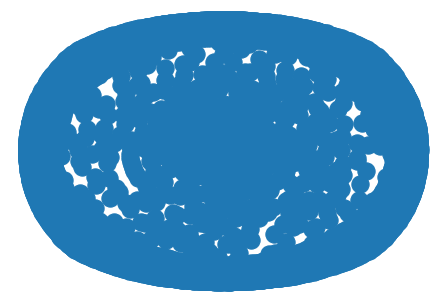

In [ ]:
nx.draw(G)

In [ ]:
!cp -r '/content/gaming_jan.gexf' /content/gdrive/MyDrive/ 

cp: cannot stat '/content/gaming_jan.gexf': No such file or directory
